In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import os

from numpy import set_printoptions
from scipy.stats import skew
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler
from sklearn.feature_selection import mutual_info_classif

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import classification_report, confusion_matrix

import keras
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict, LeaveOneOut, cross_val_score, KFold

from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import reciprocal
from sklearn import metrics
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score

from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
import xgboost
import lightgbm as lgb
from sklearn.metrics import roc_auc_score

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dropout, Activation, Dense, BatchNormalization
import torch
from transformers import BertTokenizer, BertModel
from tqdm.auto import tqdm
import warnings
warnings.filterwarnings("ignore")

<ipython-input-1-74b010851bbf>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#df_nn = pd.read_csv('/content/drive/MyDrive/Skincare Recommendation Dataset 2/Cleaned_Products_And_Reviews_Dataset/cleaned_products_and_reviews_dataset.csv')


In [ ]:
# from transformers import BertTokenizer, BertModel

# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
# model = BertModel.from_pretrained('bert-base-uncased')
# model.eval()  # Set the model to inference mode

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model.to(device)  # Move the model to the chosen device

# def get_bert_embeddings_batch(texts, batch_size=32):
#     embeddings = []
#     for i in tqdm(range(0, len(texts), batch_size)):
#         batch = texts[i:i+batch_size]
#         encoded_inputs = tokenizer(batch, return_tensors='pt', padding=True, truncation=True, max_length=512)
#         encoded_inputs = {k: v.to(device) for k, v in encoded_inputs.items()}  # Move encoded inputs to the same device as model
#         with torch.no_grad():
#             outputs = model(**encoded_inputs)
#         batch_embeddings = outputs.last_hidden_state.mean(dim=1).squeeze().detach().cpu().numpy()  # Move embeddings back to CPU for further processing/storage
#         embeddings.extend(batch_embeddings)
#     return embeddings

# # Example use case on a DataFrame column
# embeddings = get_bert_embeddings_batch(df_nn['review_text'].tolist())
# df_nn['review_text_embeddings'] = embeddings

# # Convert numpy arrays to string for saving
# df_nn['review_text_embeddings'] = df_nn['review_text_embeddings'].apply(lambda x: ','.join(map(str, x)))

# # Save the DataFrame with review text embeddings only
# df_nn[['review_text_embeddings']].to_csv('/content/drive/MyDrive/Skincare Recommendation Dataset 2/Cleaned_Products_And_Reviews_Dataset/df_nn_processed_review_texts.csv', index=False)

# Function to preprocess ingredients
# def preprocess_ingredients(ingredients):
#     ingredients = ingredients.replace('[', '').replace(']', '').replace("'", '').strip()
#     return ingredients

# def get_bert_embeddings_batch_ingredients(texts, batch_size=32):
#     embeddings = []
#     for i in tqdm(range(0, len(texts), batch_size)):
#         batch = [preprocess_ingredients(text) for text in texts[i:i+batch_size]]
#         encoded_inputs = tokenizer(batch, return_tensors='pt', padding=True, truncation=True, max_length=512)
#         encoded_inputs = {k: v.to(device) for k, v in encoded_inputs.items()}
#         with torch.no_grad():
#             outputs = model(**encoded_inputs)
#         batch_embeddings = outputs.last_hidden_state.mean(dim=1).squeeze().detach().cpu().numpy()
#         embeddings.extend(batch_embeddings)
#     return embeddings

# # Applying BERT to batches of ingredient texts
# ingredients_embeddings = get_bert_embeddings_batch_ingredients(df_nn['ingredients'].tolist())
# df_nn['ingredients_embeddings'] = ingredients_embeddings

# df_nn['ingredients_embeddings'] = df_nn['ingredients_embeddings'].apply(lambda x: ','.join(map(str, x)))

# Save the final DataFrame with both review text and ingredients embeddings
# df_nn.to_csv('/content/drive/MyDrive/Skincare Recommendation Dataset 2/Cleaned_Products_And_Reviews_Dataset/df_nn_processed_review_text_and_ingredients.csv', index=False)

# Load the final dataset
df_nn2 = pd.read_csv("/content/drive/MyDrive/Skincare Recommendation Dataset 2/Cleaned_Products_And_Reviews_Dataset/df_nn_processed_review_text_and_ingredients.csv")


In [ ]:

# os.makedirs("/content/drive/MyDrive/Skincare Recommendation Dataset 2/Deployments/Transformers_and_models")

In [ ]:
df_nn2.iloc[0]

author_id                                                          1238130325
rating_reviews                                                              4
is_recommended                                                            1.0
total_feedback_count                                                        0
total_neg_feedback_count                                                    0
total_pos_feedback_count                                                    0
review_text                 I love this lippy…it makes my lips soft and al...
skin_tone                                                           fairLight
skin_type                                                                 dry
product_id                                                            P420652
product_name                lip sleeping mask intense hydration with vitam...
brand_name                                                            laneige
price_usd_reviews                                               

In [ ]:
# import pandas as pd

# def unique_values_and_count_dataframe_for_object_columns(df):
#     """
#     This function takes a pandas DataFrame and creates a new DataFrame that contains
#     the unique values and the count of unique values for each column of dtype 'object'.

#     Parameters:
#     - df: pandas.DataFrame

#     Returns:
#     - unique_values_count_df: pandas.DataFrame, with columns ['Column', 'Unique Values', 'Count of Unique Values']
#     """
#     # Create an empty list to store information about each column's unique values and their count
#     data = []

#     # Iterate over each column in the DataFrame that is of type 'object'
#     for column in df.select_dtypes(include=['object']).columns:
#         # Calculate unique values and their count
#         unique_values = df[column].unique()
#         unique_count = len(unique_values)

#         # Append the information to the list
#         data.append({'Column': column, 'Unique Values': unique_values, 'Count of Unique Values': unique_count})

#     # Convert the list into a DataFrame for better readability and manipulation
#     unique_values_count_df = pd.DataFrame(data)

#     return unique_values_count_df

# unique_values_count_df = unique_values_and_count_dataframe_for_object_columns(df_nn2)

# # Display the DataFrame containing columns with their unique values and count
# unique_values_count_df

In [ ]:
# unique_values_count_df['Unique Values'][2]

In [ ]:
import numpy as np
import pandas as pd

def convert_embeddings(dataframe, column_name):
    """Convert comma-separated string embeddings in a dataframe column to numpy arrays of floats."""
    # Create an empty list to store the converted embeddings
    converted_embeddings = []

    # Loop through each row in the dataframe
    for index, row in dataframe.iterrows():
        # Split the string by commas and convert to float
        embedding = np.array([float(value) for value in row[column_name].split(',')])
        # Append the converted embedding to the list
        converted_embeddings.append(embedding)

    # Return the list of converted embeddings
    return converted_embeddings



# Convert 'review_text_embeddings' and 'ingredients_embeddings'
df_nn2['review_text_embeddings'] = convert_embeddings(df_nn2, 'review_text_embeddings')
df_nn2['ingredients_embeddings'] = convert_embeddings(df_nn2, 'ingredients_embeddings')

# # Print some of the converted data to verify
# print(df_nn2['review_text_embeddings'][0])  # First converted review_text_embeddings
# print(df_nn2['ingredients_embeddings'][0])  # First converted ingredients_embeddings


In [ ]:

df_nn2

,author_id,rating_reviews,is_recommended,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,review_text,skin_tone,skin_type,product_id,product_name,brand_name,price_usd_reviews,loves_count,rating_products,reviews,ingredients,price_usd_products,review_text_embeddings,ingredients_embeddings
0,1238130325,4,1.0,0,0,0,I love this lippy…it makes my lips soft and al...,fairLight,dry,P420652,lip sleeping mask intense hydration with vitam...,laneige,24.0,1081315,4.3508,16118.0,"['Diisostearyl Malate, Hydrogenated Polyisobut...",24.0,"[-0.0117636295, -0.047966536, 0.39053074, 0.00...","[-0.11568291, 0.18854155, 0.34880894, 0.062211..."
1,7554442535,5,1.0,1,0,1,I use this night and morning and LOVE it. This...,light,normal,P420652,lip sleeping mask intense hydration with vitam...,laneige,24.0,1081315,4.3508,16118.0,"['Diisostearyl Malate, Hydrogenated Polyisobut...",24.0,"[0.0631587, -0.103992976, 0.5601789, 0.0652930...","[-0.11568291, 0.18854155, 0.34880894, 0.062211..."
2,35439265952,4,1.0,4,0,4,Works for me. I use a thick layer of this last...,medium,combination,P420652,lip sleeping mask intense hydration with vitam...,laneige,24.0,1081315,4.3508,16118.0,"['Diisostearyl Malate, Hydrogenated Polyisobut...",24.0,"[-0.1189222, 0.18500704, 0.44270656, -0.084659...","[-0.11568291, 0.18854155, 0.34880894, 0.062211..."
3,32687373619,5,1.0,3,1,2,Love the way this makes my lips feel and look....,lightMedium,dry,P420652,lip sleeping mask intense hydration with vitam...,laneige,24.0,1081315,4.3508,16118.0,"['Diisostearyl Malate, Hydrogenated Polyisobut...",24.0,"[-0.03785482, 0.11128563, 0.37729356, 0.120141...","[-0.11568291, 0.18854155, 0.34880894, 0.062211..."
4,12321026443,5,1.0,0,0,0,Very hydrating! I use this as everyday lip bal...,light,oily,P420652,lip sleeping mask intense hydration with vitam...,laneige,24.0,1081315,4.3508,16118.0,"['Diisostearyl Malate, Hydrogenated Polyisobut...",24.0,"[0.12977254, -0.10079296, 0.39444563, 0.002485...","[-0.11568291, 0.18854155, 0.34880894, 0.062211..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143664,1366687628,2,0.0,0,0,0,I was not a fan of this eye cream at all. It s...,fair,combination,P297531,eye doctor moisture care for skin around eyes,origins,49.0,27439,4.0519,501.0,"['Water, Butylene Glycol, Myristyl Myristate, ...",49.0,"[0.078183055, -0.052167118, 0.24779814, -0.076...","[-0.15026252, 0.09923749, 0.33884236, 0.018827..."
143665,1575270126,3,0.0,0,0,0,I found this eye cream to be just okay. I’ve j...,light,dry,P297531,eye doctor moisture care for skin around eyes,origins,49.0,27439,4.0519,501.0,"['Water, Butylene Glycol, Myristyl Myristate, ...",49.0,"[0.13872541, -0.056246415, 0.30797133, -0.0934...","[-0.15026252, 0.09923749, 0.33884236, 0.018827..."
143666,1012371232,1,0.0,9,2,7,This is incredibly overpriced for what you get...,fair,dry,P459130,hyaluronic serum,dr. lara devgan scientific beauty,245.0,2777,4.7850,321.0,"['Water, Glycerin, Niacinamide, Sodium Chondro...",245.0,"[0.009035852, 0.014580233, 0.35060394, 0.13069...","[-0.15053327, 0.08755815, 0.09443791, 0.024801..."
143667,8476486187,1,0.0,0,0,0,This is a relabeled $69 DRMTLGY Needle-less Se...,light,oily,P459130,hyaluronic serum,dr. lara devgan scientific beauty,245.0,2777,4.7850,321.0,"['Water, Glycerin, Niacinamide, Sodium Chondro...",245.0,"[0.14014012, -0.03602933, 0.5062356, 0.0474689...","[-0.15053327, 0.08755815, 0.09443791, 0.024801..."


In [ ]:
df_nn2['review_text_embeddings'].shape

(143669,)

In [ ]:
df_nn2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143669 entries, 0 to 143668
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   author_id                 143669 non-null  object 
 1   rating_reviews            143669 non-null  int64  
 2   is_recommended            143669 non-null  float64
 3   total_feedback_count      143669 non-null  int64  
 4   total_neg_feedback_count  143669 non-null  int64  
 5   total_pos_feedback_count  143669 non-null  int64  
 6   review_text               143669 non-null  object 
 7   skin_tone                 143669 non-null  object 
 8   skin_type                 143669 non-null  object 
 9   product_id                143669 non-null  object 
 10  product_name              143669 non-null  object 
 11  brand_name                143669 non-null  object 
 12  price_usd_reviews         143669 non-null  float64
 13  loves_count               143669 non-null  i

In [ ]:
# List of columns to drop
columns_to_drop = ['review_text', 'ingredients']

# Create a new DataFrame with all columns except the specified ones
df_nn2 = df_nn2.drop(columns=columns_to_drop)


In [ ]:
# Assuming df_nn2 is your dataframe and embeddings have been correctly parsed as described before
import numpy as np

# Stack embeddings to create a uniform 2D numpy array for each embedding type
review_text_embeddings = np.stack(df_nn2['review_text_embeddings'].values)
ingredients_embeddings = np.stack(df_nn2['ingredients_embeddings'].values)




In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np


# Initialize label encoders
user_id_encoder = LabelEncoder()
skin_tone_encoder = LabelEncoder()
skin_type_encoder = LabelEncoder()
brand_name_encoder = LabelEncoder()
product_name_encoder = LabelEncoder()

# Encode the specified columns
df_nn2['user_id_encoded'] = user_id_encoder.fit_transform(df_nn2['author_id'].astype(str))
df_nn2['skin_tone_encoded'] = skin_tone_encoder.fit_transform(df_nn2['skin_tone'])
df_nn2['skin_type_encoded'] = skin_type_encoder.fit_transform(df_nn2['skin_type'])
df_nn2['brand_name_encoded'] = brand_name_encoder.fit_transform(df_nn2['brand_name'])
df_nn2['product_name_encoded'] = product_name_encoder.fit_transform(df_nn2['product_name'])

# Drop the original columns that have been encoded
df_nn2 = df_nn2.drop(columns=['author_id', 'skin_tone', 'skin_type', 'brand_name', 'product_name'])

# Normalize numerical features
scaler = StandardScaler()
numerical_features = ['price_usd_reviews', 'loves_count', 'rating_products']
df_nn2[numerical_features] = scaler.fit_transform(df_nn2[numerical_features])

# Split data into train and test sets
train, test = train_test_split(df_nn2, test_size=0.2, random_state=42)

# Separate features for different inputs
X_train = train.drop(columns=['rating_reviews'])
y_train = train['rating_reviews']
X_test = test.drop(columns=['rating_reviews'])
y_test = test['rating_reviews']


In [ ]:
X_train.shape

(114935, 17)

In [ ]:
y_train.shape

(114935,)

In [ ]:
X_test.shape

(28734, 17)

In [ ]:
y_test.shape

(28734,)

In [ ]:
import pickle
from sklearn.preprocessing import StandardScaler



# Save the scaler to a file
with open('/content/drive/MyDrive/Skincare Recommendation Dataset 2/Deployments/Transformers_and_models/standardscaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)


In [ ]:
import pickle

# Assuming you have these encoders initialized and fitted
encoders = {
    'user_id_encoder': user_id_encoder,
    'skin_tone_encoder': skin_tone_encoder,
    'skin_type_encoder': skin_type_encoder,
    'brand_name_encoder': brand_name_encoder,
    'product_name_encoder': product_name_encoder
}

for name, encoder in encoders.items():
    with open(f'/content/drive/MyDrive/Skincare Recommendation Dataset 2/Deployments/Transformers_and_models/{name}.pkl', 'wb') as file:
        pickle.dump(encoder, file)


In [ ]:
y_train

4998      1
38784     5
119862    4
48103     5
49075     1
         ..
110268    5
119879    5
103694    5
131932    5
121958    5
Name: rating_reviews, Length: 114935, dtype: int64

In [ ]:
X_test.head(3)

,is_recommended,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,product_id,price_usd_reviews,loves_count,rating_products,reviews,price_usd_products,review_text_embeddings,ingredients_embeddings,user_id_encoded,skin_tone_encoded,skin_type_encoded,brand_name_encoded,product_name_encoded
59499,1.0,9,5,4,P443842,-0.909461,0.919203,0.123757,1137.0,12.99,"[0.12729463, -0.12197065, 0.3428065, -0.056435...","[-0.1877428, 0.20864426, 0.37716103, 0.1421736...",225,4,2,71,389
26882,1.0,1,0,1,P442840,-0.052784,0.969545,-0.194003,2449.0,54.00,"[0.02525261, 0.004013752, 0.3350466, -0.096045...","[-0.26820394, 0.11713056, 0.3608714, 0.0981859...",4154,10,0,61,66
68789,1.0,0,0,0,P481831,-0.303458,-0.563473,1.131290,1053.0,42.00,"[0.114722334, -0.18157855, 0.35107493, 0.01246...","[-0.10707408, 0.17555091, 0.2719978, 0.0423845...",6364,4,0,63,476


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Dense, Flatten, concatenate, Dropout, Multiply
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K

def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

# Define input layers
user_input = Input(shape=(1,), name='user_input')
skin_tone_input = Input(shape=(1,), name='skin_tone_input')
skin_type_input = Input(shape=(1,), name='skin_type_input')
# product_input = Input(shape=(1,), name='product_input')
brand_input = Input(shape=(1,), name='brand_input')
product_name_input = Input(shape=(1,), name='product_name_input')
price_input = Input(shape=(1,), name='price_input')
rating_input = Input(shape=(1,), name='rating_input')
loves_input = Input(shape=(1,), name='loves_input')

review_input = Input(shape=(default_review_embedding.shape[0],), name='review_input')
ingredients_input = Input(shape=(default_ingredients_embedding.shape[0],), name='ingredients_input')

# Define embedding layers
user_embedding = Embedding(input_dim=df_nn2['user_id_encoded'].nunique(), output_dim=50, name='user_embedding')(user_input)
skin_tone_embedding = Embedding(input_dim=df_nn2['skin_tone_encoded'].nunique(), output_dim=10, name='skin_tone_embedding')(skin_tone_input)
skin_type_embedding = Embedding(input_dim=df_nn2['skin_type_encoded'].nunique(), output_dim=10, name='skin_type_embedding')(skin_type_input)
# product_embedding = Embedding(input_dim=df_nn2['product_id'].nunique(), output_dim=50, name='product_embedding')(product_input)
brand_embedding = Embedding(input_dim=df_nn2['brand_name_encoded'].nunique(), output_dim=50, name='brand_embedding')(brand_input)
product_name_embedding = Embedding(input_dim=df_nn2['product_name_encoded'].nunique(), output_dim=50, name='product_name_embedding')(product_name_input)

# Flatten embedding layers
user_vec = Flatten()(user_embedding)
skin_tone_vec = Flatten()(skin_tone_embedding)
skin_type_vec = Flatten()(skin_type_embedding)
# product_vec = Flatten()(product_embedding)
brand_vec = Flatten()(brand_embedding)
product_name_vec = Flatten()(product_name_embedding)

# GMF Path: Element-wise multiplication (dot product)
gmf_vec = Multiply()([user_vec, product_name_vec])
gmf_output = Dense(64, activation='relu')(gmf_vec)

# NCF Path: Concatenate all embeddings and other features
ncf_vec = concatenate([
    user_vec, skin_tone_vec, skin_type_vec, brand_vec, product_name_vec,
    price_input, rating_input, loves_input, review_input, ingredients_input
])

# NCF layers
ncf_hidden1 = Dense(128, activation='relu')(ncf_vec)
ncf_hidden2 = Dense(64, activation='relu')(ncf_hidden1)
ncf_output = Dense(32, activation='relu')(ncf_hidden2)

# Concatenate GMF and NCF outputs
concat_output = concatenate([gmf_output, ncf_output])

# Final prediction layer (use linear activation for regression)
final_output = Dense(1, activation='linear')(concat_output)

# Define the model
model = Model(inputs=[
    user_input, skin_tone_input, skin_type_input, brand_input, product_name_input,
    price_input, rating_input, loves_input, review_input, ingredients_input
], outputs=final_output)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', rmse, 'mse'])

# Display model summary
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 user_input (InputLayer)     [(None, 1)]                  0         []                            
                                                                                                  
 product_name_input (InputL  [(None, 1)]                  0         []                            
 ayer)                                                                                            
                                                                                                  
 skin_tone_input (InputLaye  [(None, 1)]                  0         []                            
 r)                                                                                               
                                                                                              

In [ ]:
from tensorflow.keras.utils import plot_model

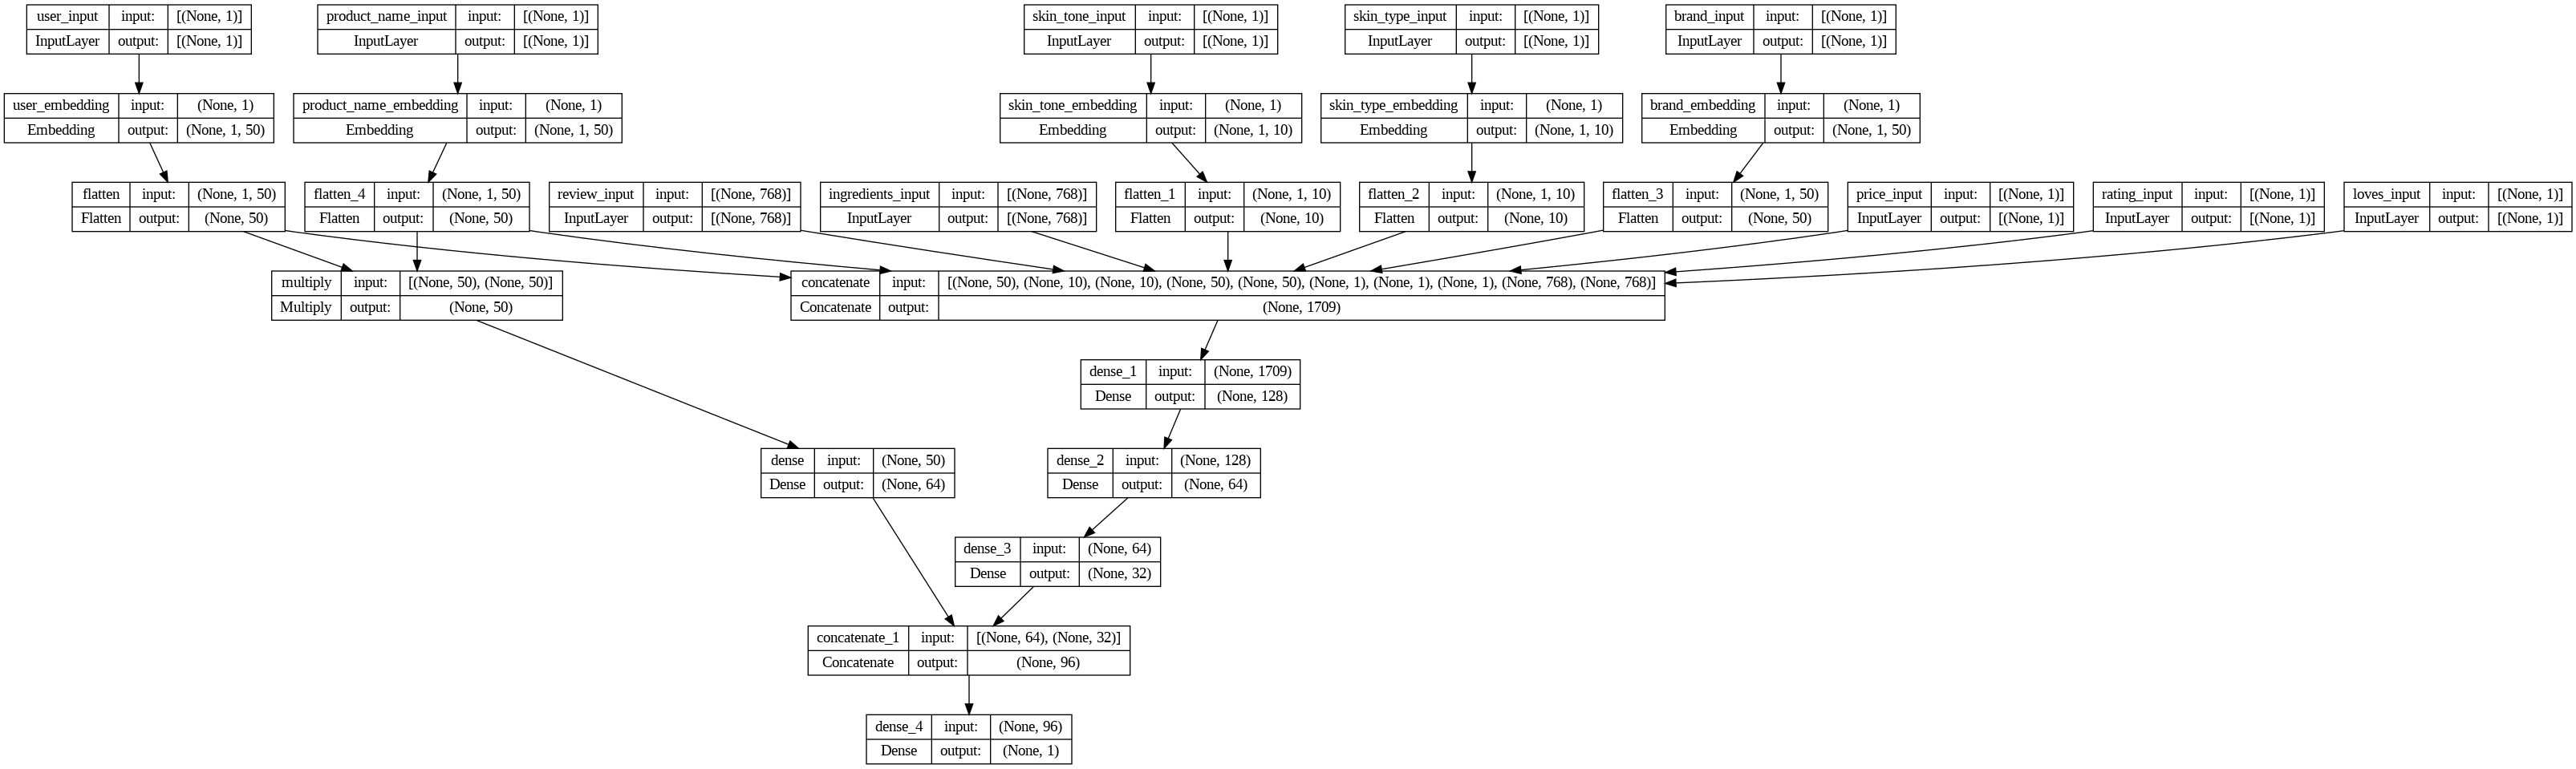

In [ ]:
plot_model(model, to_file='GMF+NCF_Model.png', show_shapes=True, show_layer_names=True)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Dense, Flatten, concatenate, Dropout, Multiply
from tensorflow.keras.models import Model

# Example function to compute default embeddings (if not already defined)
def compute_default_embeddings(X_train):
    review_embeddings = np.stack(X_train['review_text_embeddings'].values)
    ingredients_embeddings = np.stack(X_train['ingredients_embeddings'].values)

    default_review_embedding = np.mean(review_embeddings, axis=0)
    default_ingredients_embedding = np.mean(ingredients_embeddings, axis=0)

    return default_review_embedding, default_ingredients_embedding

# Compute default embeddings
default_review_embedding, default_ingredients_embedding = compute_default_embeddings(X_train)

# Prepare the training inputs
user_ids = X_train['user_id_encoded'].values
skin_tones = X_train['skin_tone_encoded'].values
skin_types = X_train['skin_type_encoded'].values
brand_ids = X_train['brand_name_encoded'].values
product_name_ids = X_train['product_name_encoded'].values
prices = X_train['price_usd_reviews'].values
ratings = X_train['rating_products'].values
loves_counts = X_train['loves_count'].values

review_embeddings = np.stack(X_train['review_text_embeddings'].values)
ingredients_embeddings = np.stack(X_train['ingredients_embeddings'].values)

# Handle missing embeddings
for i in range(len(review_embeddings)):
    if np.isnan(review_embeddings[i]).any():
        review_embeddings[i] = default_review_embedding
for i in range(len(ingredients_embeddings)):
    if np.isnan(ingredients_embeddings[i]).any():
        ingredients_embeddings[i] = default_ingredients_embedding

# Prepare inputs for the model
train_inputs = {
    'user_input': user_ids,
    'skin_tone_input': skin_tones,
    'skin_type_input': skin_types,
    'brand_input': brand_ids,
    'product_name_input': product_name_ids,
    'price_input': prices,
    'rating_input': ratings,
    'loves_input': loves_counts,
    'review_input': review_embeddings,
    'ingredients_input': ingredients_embeddings
}

# Targets (actual ratings)
train_targets = y_train.values  # Ensure this is a numpy array

# Define the model (assuming it's already defined as in the previous example)

# Train the model using the actual embeddings
model.fit(
    x=train_inputs,
    y=train_targets,
    epochs=20,
    batch_size=32,
    validation_split=0.2
)


Epoch 1/20
2874/2874 [==============================] - 41s 14ms/step - loss: 0.2883 - mae: 0.3645 - rmse: 0.5227 - mse: 0.2883 - val_loss: 0.3159 - val_mae: 0.4364 - val_rmse: 0.5515 - val_mse: 0.3159
Epoch 2/20
2874/2874 [==============================] - 38s 13ms/step - loss: 0.1649 - mae: 0.2711 - rmse: 0.3934 - mse: 0.1649 - val_loss: 0.2473 - val_mae: 0.3066 - val_rmse: 0.4797 - val_mse: 0.2473
Epoch 3/20
2874/2874 [==============================] - 41s 14ms/step - loss: 0.0853 - mae: 0.1965 - rmse: 0.2823 - mse: 0.0853 - val_loss: 0.2526 - val_mae: 0.3248 - val_rmse: 0.4870 - val_mse: 0.2526
Epoch 4/20
2874/2874 [==============================] - 38s 13ms/step - loss: 0.0541 - mae: 0.1606 - rmse: 0.2254 - mse: 0.0541 - val_loss: 0.2450 - val_mae: 0.3057 - val_rmse: 0.4781 - val_mse: 0.2450
Epoch 5/20
2874/2874 [==============================] - 40s 14ms/step - loss: 0.0406 - mae: 0.1413 - rmse: 0.1957 - mse: 0.0406 - val_loss: 0.2362 - val_mae: 0.2847 - val_rmse: 0.4669 - val_ms

In [ ]:
# # Mount Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

# Define the base path
base_path = '/content/drive/MyDrive/Skincare Recommendation Dataset 2/Deployments/Transformers_and_models/'

# Define the full path for the model
model_path = base_path + 'GMF_NCF_model'

# Save the model
model.save(model_path)

print(f'Model saved to {model_path}')


Model saved to /content/drive/MyDrive/Skincare Recommendation Dataset 2/Deployments/Transformers_and_models/GMF_NCF_model


In [ ]:
import numpy as np

# Compute default embeddings based on X_train
review_embeddings_test = np.stack(X_test['review_text_embeddings'].values)
ingredients_embeddings_test = np.stack(X_test['ingredients_embeddings'].values)

# Prepare the testing inputs
user_ids_test = X_test['user_id_encoded'].values
skin_tones_test = X_test['skin_tone_encoded'].values
skin_types_test = X_test['skin_type_encoded'].values
brand_ids_test = X_test['brand_name_encoded'].values
product_name_ids_test = X_test['product_name_encoded'].values
prices_test = X_test['price_usd_reviews'].values
ratings_test = X_test['rating_products'].values
loves_counts_test = X_test['loves_count'].values

def compute_default_embeddings(X_test):
    review_embeddings = np.stack(X_test['review_text_embeddings'].values)
    ingredients_embeddings = np.stack(X_test['ingredients_embeddings'].values)

    default_review_embedding = np.mean(review_embeddings, axis=0)
    default_ingredients_embedding = np.mean(ingredients_embeddings, axis=0)

    return default_review_embedding, default_ingredients_embedding

# Compute default embeddings
default_review_embedding, default_ingredients_embedding = compute_default_embeddings(X_test)

# Handle missing embeddings in the test set
for i in range(len(review_embeddings_test)):
    if np.isnan(review_embeddings_test[i]).any():
        review_embeddings_test[i] = default_review_embedding
for i in range(len(ingredients_embeddings_test)):
    if np.isnan(ingredients_embeddings_test[i]).any():
        ingredients_embeddings_test[i] = default_ingredients_embedding

# Prepare inputs for the model for testing
test_inputs = {
    'user_input': user_ids_test,
    'skin_tone_input': skin_tones_test,
    'skin_type_input': skin_types_test,
    'brand_input': brand_ids_test,
    'product_name_input': product_name_ids_test,
    'price_input': prices_test,
    'rating_input': ratings_test,
    'loves_input': loves_counts_test,
    'review_input': review_embeddings_test,
    'ingredients_input': ingredients_embeddings_test
}


test_targets = y_test.values


In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import pickle
from tensorflow.keras.models import load_model
from tensorflow.keras import backend as K
from tensorflow.keras.models import load_model

def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

# Path to the saved model
model_path = '/content/drive/MyDrive/Skincare Recommendation Dataset 2/Deployments/Transformers_and_models/GMF_NCF_model'

# Load the model
keras_model = load_model(model_path, custom_objects={'rmse': rmse})

# Evaluate the model on the test set
test_loss, test_mae, test_rmse, test_mse = keras_model.evaluate(test_inputs, test_targets, verbose=1)

print("Test Loss:", test_loss)
print("Test MAE:", test_mae)
print("Test RMSE:", test_rmse)
print("Test MSE:", test_mse)


898/898 [==============================] - 4s 4ms/step - loss: 0.2239 - mae: 0.2487 - rmse: 0.4519 - mse: 0.2239
Test Loss: 0.22385700047016144
Test MAE: 0.2486840784549713
Test RMSE: 0.45188775658607483
Test MSE: 0.22385700047016144


In [ ]:
import numpy as np

user_ids = np.array(X_test['user_id_encoded'])
product_names = np.array(X_test['product_name_encoded'])

# Now use these arrays in your predictions DataFrame
predictions = keras_model.predict(test_inputs)

# Create the DataFrame for displaying predictions
predictions_df = pd.DataFrame({
    'User ID': user_ids,
    'Product Name': product_names,
    'Estimated Rating': predictions.flatten()
})

# Sort by 'Estimated Rating' to show the highest predictions at the top
predictions_df.sort_values(by='Estimated Rating', ascending=False, inplace=True)

# Display the DataFrame
predictions_df.head()


898/898 [==============================] - 5s 5ms/step


,User ID,Product Name,Estimated Rating
17037,7437,456,5.906567
5027,4037,489,5.879189
27069,3081,112,5.698687
2603,1387,196,5.667239
7991,1581,549,5.658485


In [ ]:
predictions_df

,User ID,Product Name,Estimated Rating
17037,7437,456,5.906567
5027,4037,489,5.879189
27069,3081,112,5.698687
2603,1387,196,5.667239
7991,1581,549,5.658485
...,...,...,...
13990,6043,80,0.348842
19191,7993,122,0.312732
20851,3419,399,0.310658
28400,8244,307,0.217345


In [ ]:
import pandas as pd
df_nn3 = pd.read_csv("/content/drive/MyDrive/Skincare Recommendation Dataset 2/Cleaned_Products_And_Reviews_Dataset/df_nn_processed_review_text_and_ingredients.csv")

In [ ]:
import pandas as pd

unique_products_df = df_nn3.drop_duplicates(subset=['product_name'])

# Define the columns that pertain to products and users
product_columns = [
    'brand_name', 'product_name', 'price_usd_reviews',
    'rating_products', 'loves_count', 'review_text_embeddings', 'ingredients_embeddings'
]

user_columns = [
    'author_id', 'skin_tone', 'skin_type'
]

# Create the product details DataFrame from the unique products DataFrame
product_details = unique_products_df[product_columns]

# Create the user details DataFrame from the original DataFrame (df_nn2)
user_details = df_nn3[user_columns].drop_duplicates()

# Output the first few rows of each DataFrame to verify
product_details.head()
user_details.head()


,author_id,skin_tone,skin_type
0,1238130325,fairLight,dry
1,7554442535,light,normal
2,35439265952,medium,combination
3,32687373619,lightMedium,dry
4,12321026443,light,oily


In [ ]:
import numpy as np
import pandas as pd
import pickle
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import backend as K

# Define the RMSE function to use when loading the model
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

# Load the necessary objects and model
# Load individual encoders
with open('/content/drive/MyDrive/Skincare Recommendation Dataset 2/Deployments/Transformers_and_models/user_id_encoder.pkl', 'rb') as file:
    user_id_encoder = pickle.load(file)
with open('/content/drive/MyDrive/Skincare Recommendation Dataset 2/Deployments/Transformers_and_models/skin_type_encoder.pkl', 'rb') as file:
    skin_type_encoder = pickle.load(file)
with open('/content/drive/MyDrive/Skincare Recommendation Dataset 2/Deployments/Transformers_and_models/skin_tone_encoder.pkl', 'rb') as file:
    skin_tone_encoder = pickle.load(file)
with open('/content/drive/MyDrive/Skincare Recommendation Dataset 2/Deployments/Transformers_and_models/product_name_encoder.pkl', 'rb') as file:
    product_name_encoder = pickle.load(file)
with open('/content/drive/MyDrive/Skincare Recommendation Dataset 2/Deployments/Transformers_and_models/brand_name_encoder.pkl', 'rb') as file:
    brand_name_encoder = pickle.load(file)

# Load the model, including the custom RMSE function
model_path = '/content/drive/MyDrive/Skincare Recommendation Dataset 2/Deployments/Transformers_and_models/GMF_NCF_model'
keras_model = load_model(model_path, custom_objects={'rmse': rmse})

# Standardize numerical features
scaler = StandardScaler()
numerical_features = ['price_usd_reviews', 'loves_count', 'rating_products']
product_details[numerical_features] = scaler.fit_transform(product_details[numerical_features])

user_details_specific = user_details.iloc[3]

# Get the encoded user ID and other details
user_input = np.array([user_id_encoder.transform([str(user_details_specific['author_id'])])])
skin_tone_input = np.array([skin_tone_encoder.transform([user_details_specific['skin_tone']])])
skin_type_input = np.array([skin_type_encoder.transform([user_details_specific['skin_type']])])

# DataFrame to store predictions
predictions_df = pd.DataFrame(columns=['User ID', 'Product Name', 'Estimated Rating'])

# Loop through each product and predict the rating
for _, product in product_details.iterrows():
    brand_input = np.array([brand_name_encoder.transform([product['brand_name']])])
    product_name_input = np.array([product_name_encoder.transform([product['product_name']])])
    price_input = np.array([[product['price_usd_reviews']]])
    rating_input = np.array([[product['rating_products']]])
    loves_input = np.array([[product['loves_count']]])

    # Prepare inputs for the model
    model_inputs = {
        'user_input': user_input,
        'skin_tone_input': skin_tone_input,
        'skin_type_input': skin_type_input,
        'brand_input': brand_input,
        'product_name_input': product_name_input,
        'price_input': price_input,
        'rating_input': rating_input,
        'loves_input': loves_input,
        'review_input': np.array([default_review_embedding]),  # Default embedding
        'ingredients_input': np.array([default_ingredients_embedding])  # Default embedding
    }

    # Predict the estimated rating
    estimated_rating = keras_model.predict(model_inputs)[0][0]

    # Append the new prediction to the DataFrame
    new_row = pd.DataFrame({
        'User ID': [user_details_specific['author_id']],
        'Product Name': [product['product_name']],
        'Estimated Rating': [estimated_rating]
    })

    # Concatenate the new row to the existing DataFrame
    predictions_df = pd.concat([predictions_df, new_row], ignore_index=True)

# Display the results, sorted by the estimated rating
print(predictions_df.sort_values(by='Estimated Rating', ascending=False))


1/1 [==============================] - 0s 37ms/step
         User ID                                       Product Name  \
561  32687373619                 glow stick sunscreen spf 50 pa++++   
154  32687373619        100% organic cold-pressed rose hip seed oil   
21   32687373619                   the true cream moisturizing bomb   
388  32687373619      alpha arbutin 2% + ha hyperpigmentation serum   
516  32687373619                irish moor mud purifying black mask   
..           ...                                                ...   
336  32687373619          clearly corrective dark spot solution duo   
513  32687373619  oil and pore control mattifier broad spectrum ...   
335  32687373619      clearly corrective dark spot correcting serum   
48   32687373619       greek yoghurt nourishing probiotic gel-cream   
453  32687373619                   evercalm overnight recovery balm   

     Estimated Rating  
561          5.372226  
154          5.098718  
21           5.060639  

In [ ]:
predictions_df.sort_values(by='Estimated Rating', ascending=False)

,User ID,Product Name,Estimated Rating
561,32687373619,glow stick sunscreen spf 50 pa++++,5.372226
154,32687373619,100% organic cold-pressed rose hip seed oil,5.098718
21,32687373619,the true cream moisturizing bomb,5.060639
388,32687373619,alpha arbutin 2% + ha hyperpigmentation serum,5.058539
516,32687373619,irish moor mud purifying black mask,5.003508
...,...,...,...
336,32687373619,clearly corrective dark spot solution duo,3.642652
513,32687373619,oil and pore control mattifier broad spectrum ...,3.622369
335,32687373619,clearly corrective dark spot correcting serum,3.604236
48,32687373619,greek yoghurt nourishing probiotic gel-cream,3.544559
